### CONTEXT:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable. It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful. We can collect app
data and user ratings from the app stores and use it to extract insightful information. A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 

### PROJECT OBJECTIVE:
The Goal is to predict the rating for an app based on the given input features like size, number of downloads etc. 

### DATA DESCRIPTION: 
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for category, rating, size, and more. 
1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app
4. Reviews: Number of user reviews for the app
5. Size: Size of the app
6. Installs: Number of user downloads/installs for the app
7. Type: Paid or Free
8. Price: Price of the app
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10. Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres. 
11. Last Updated: Date when the app was last updated on Play Store
12. Current Ver: Current version of the app available on Play Store
13. Android Ver: Min required Android version

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 
pd.set_option('display.max_columns', None)                              
pd.set_option('display.max_colwidth', None)                           
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt 
#plt.style.use('dark_background')
import seaborn as sns                                              
sns.set(style='whitegrid')
sns.color_palette('dark')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#df = pd.read_csv('Apps_data.csv')
df = pd.read_csv('/content/drive/MyDrive/IIITD Projects/Advanced Machine Leasning/AML Project 1/Apps_data.csv')

In [30]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       9659 non-null   object 
 1   Rating         8196 non-null   float64
 2   Reviews        9659 non-null   object 
 3   Size           9659 non-null   object 
 4   Installs       9659 non-null   object 
 5   Type           9658 non-null   object 
 6   Price          9659 non-null   object 
 7   ContentRating  9659 non-null   object 
 8   Genres         9659 non-null   object 
 9   LastUpdated    9659 non-null   object 
 10  CurrentVer     9651 non-null   object 
 11  AndroidVer     9657 non-null   object 
dtypes: float64(1), object(11)
memory usage: 981.0+ KB


In [7]:
def ifDuplicateSamples(data):
  NoOfDuplicateRows = data.duplicated().sum()
  if NoOfDuplicateRows == 0:
    print("There are no duplicate rows")
    return
  else:
    print("There are ",NoOfDuplicateRows,"duplicate rows")

In [8]:
ifDuplicateSamples(df)

There are  483 duplicate rows


In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

The duplicate samples have been removed.

### Renaming a few features names for easy accessibility

In [10]:
df.rename(columns = {'Content Rating':'ContentRating', 'Last Updated':'LastUpdated','Current Ver':'CurrentVer','Android Ver':'AndroidVer'}, inplace=True)

### Missing Value Imputation

In [11]:
def missing_data(df):
  missing_data = pd.DataFrame({'net_missing': df.isnull().sum(), '%missing': (df.isnull().sum()/len(df))*100})
  print(missing_data)

missing_data(df)

               net_missing   %missing
App                      0   0.000000
Category                 0   0.000000
Rating                1465  14.143657
Reviews                  0   0.000000
Size                     0   0.000000
Installs                 0   0.000000
Type                     1   0.009654
Price                    0   0.000000
ContentRating            1   0.009654
Genres                   0   0.000000
LastUpdated              0   0.000000
CurrentVer               8   0.077235
AndroidVer               3   0.028963


'Rating','Type','Content Rating','Current Ver','Android Ver'

### LastUpdated

- We can also do away with LastUpdated for obvious reasons.
- We Last update has also no saying on the rating of an app. 
- One, we do not have the current date, and two: even if we have, we would rather know the quality of update than the time spent since last update.

In [33]:
df = df.drop(columns=['LastUpdated'])

KeyError: ignored

### App

- The feature 'App' can be removed. We don't need the names. But before removing this feature, let me first be sure if the names are not repated.

In [23]:
df.App.duplicated().sum()

698

- So, clearly, a few apps have duplicated entries with changes in other features. Let me have a glimpse.

In [24]:
df.App.describe()

count      10357
unique      9659
top       ROBLOX
freq           9
Name: App, dtype: object

- ROBLOX has maximum representation. Let's check it.

In [25]:
df[df.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


- Everything except 'Reviews' and 'Category' is same for all duplicate samples of ROBLOX.
- We seem to have data of different times. Maybe at some time, they decided to change the category of the app.
- So, I would choose number of reviews to be a defining criteria. The latest update should have bigger number of reviews (though it's mysterious how the rating can be same across). 
- But let's not cogitate more. And drop rest of the samples, except for one, the first one. Review number don't change much.
- Number of reviews is more important a feature when it comes to decidng the Rating.
- I will follow the same routine with rest of duplicate samples.

In [26]:
df = df.drop_duplicates(subset=['App'], keep='first')

Now, let's drop the feature 'App' altogether.

In [28]:
df.drop(columns = ['App'], inplace=True)

KeyError: ignored

## Rating

In [12]:
df.Rating.describe()

count    8893.000000
mean        4.189542
std         0.545452
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [13]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- Removing all samples with Ratings greater than 5, as they are clearly bogus.
- We can impute them with mode, but I do not wish to play with the data by falsifying information specially when the number of such entries is ony one.
- We also observe that the corresponding 'ContentRating' is also unavailable (NaN). So by dropping this sample, we would be getting rid of missing values in ContentRating column.
- We also see that we have Type of this sample as 0. So that is also being removed. 
- Let's check the missing values once after removing this feature.

In [14]:
df.drop(df[df.Rating >5].index, inplace=True)

In [15]:
missing_data(df)

               net_missing   %missing
App                      0   0.000000
Category                 0   0.000000
Rating                1465  14.145023
Reviews                  0   0.000000
Size                     0   0.000000
Installs                 0   0.000000
Type                     1   0.009655
Price                    0   0.000000
ContentRating            0   0.000000
Genres                   0   0.000000
LastUpdated              0   0.000000
CurrentVer               8   0.077242
AndroidVer               2   0.019311


- 15 percent of the samples have missing 'Rating' values 
- This is a significant number specially when we consider the fact that 'Rating' is the feature to be predicted. 
- We have to be careful about our analysis. We cannot just feed medians without proper justification.
- Let's draw the boxplot to understand the range of ratings. 

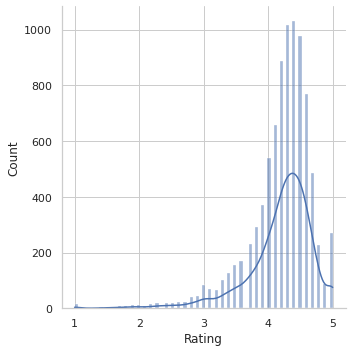

In [16]:
sns.displot(x=df.Rating,kde=True)
plt.show()

- The ratings are highly right skewed and most of the values are around 4.4.
- Generally on Goole Store, we do find such trend. People give the rating highly if the product is free and it serves the purpose. 
- Low ratings are given to particular products only. 
- Let's check the corresponding number of downloads. I would be careful about giving someone a very high rating with very large userbase, because that is a rare case.

In [19]:
df[['Rating','Installs']].sample(50)

,Rating,Installs
10483,NaN,100+
6400,4.0,"500,000+"
3763,4.3,"10,000+"
2616,4.5,"10,000,000+"
8225,NaN,10+
10840,4.5,"10,000,000+"
607,4.6,"10,000+"
1219,4.0,"100,000+"
2151,4.7,"500,000+"
817,4.0,"100,000+"


- It appears that most of samples that have missing Rating also DO NOT have a very high number of installs.
- It would be useful to do check only the NaN Rating samples 

In [22]:
df[df['Rating'].isna()].sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
7262,Themes DAF CF 85,PERSONALIZATION,NaN,3,14M,100+,Free,0,Teen,Personalization,"May 13, 2016",1.0,2.3.3 and up
9730,Lean EQ,BUSINESS,NaN,6,10M,10+,Paid,$89.99,Everyone,Business,"February 14, 2017",1.0,4.1 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0+,Paid,$2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up
10333,Santa Fe Map and Walks,TRAVEL_AND_LOCAL,NaN,2,47M,"1,000+",Free,0,Everyone,Travel & Local,"April 20, 2018",32,4.0 and up
6956,QR & Barcode Scanner BX PRO,TOOLS,NaN,4,3.0M,"1,000+",Free,0,Everyone,Tools,"October 30, 2017",1.0,4.2 and up
9329,EG Groups,EVENTS,NaN,0,1.1M,10+,Free,0,Everyone,Events,"October 15, 2017",1.0.0,4.0 and up
9937,NativeScript Developer Day EU,BUSINESS,NaN,2,12M,100+,Free,0,Everyone,Business,"September 23, 2017",1.2,4.2 and up
10109,哈哈姆特不EY,COMMUNICATION,NaN,239,18M,"10,000+",Free,0,Everyone,Communication,"July 31, 2018",1.3.4,4.4 and up
5832,¡Ay Caramba!,FAMILY,NaN,0,549k,1+,Paid,$1.99,Everyone,Education,"June 13, 2014",1.2,3.0 and up
6434,Skywatch BL,WEATHER,NaN,15,10M,"1,000+",Free,0,Everyone,Weather,"February 20, 2017",1.1.6,4.4 and up


['Type','Content Rating','Current Ver','Android Ver']

In [46]:
df[df.Type == NaN]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer


In [47]:
df['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

I will put mode into it. Most of the apps are Free.

In [ ]:
df['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64